# Análise Exploratória

#### Alunos: Ellen Shen, Enzo Neto, Gabriel Huerta, Giulia Castro

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

In [2]:
top_2017_2018 = pd.read_excel("top2018_2017.xlsx", index_col=1)

In [3]:
top_2017_2018.head(3)

,id,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,,,,
God's Plan,6DCZcSspjsKoFjzjrWoCd,Drake,0.754,0.449,7.0,-9211.0,1.0,0.1090,0.0332,0.000083,0.552,0.357,77169.0,198973.0,4.0
SAD!,3ee8Jmje8o58CHK66QrVC,XXXTENTACION,0.740,0.613,8.0,NaN,1.0,0.1450,0.2580,0.003720,0.123,0.473,75023.0,166606.0,4.0
rockstar (feat. 21 Savage),0e7ipj03S05BNilyu5bRz,Post Malone,0.587,0.535,5.0,NaN,0.0,0.0898,0.1170,0.000066,0.131,0.140,159847.0,218147.0,4.0


<IPython.core.display.Javascript object>


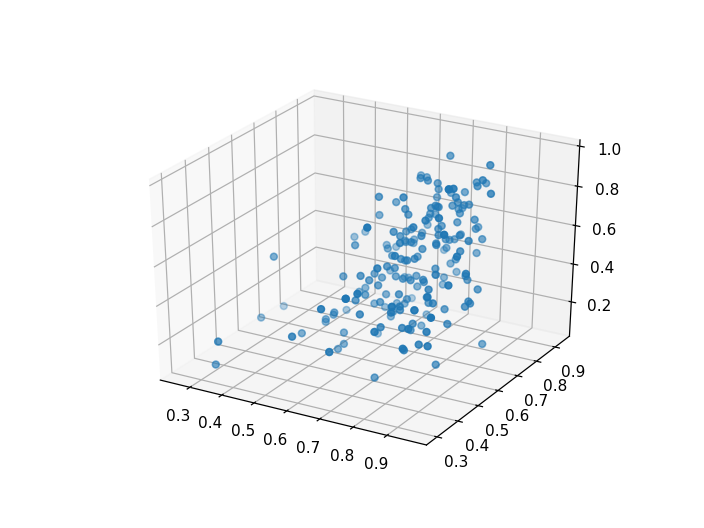

In [4]:
plt3d_2017_2018 = plt.figure().gca(projection="3d")
plt3d_2017_2018.scatter(top_2017_2018.danceability, top_2017_2018.energy, top_2017_2018.valence)

In [5]:
dados_entrada_2017_2018 = top_2017_2018.loc[:,("danceability", "energy", "valence")]

In [6]:
three_means_2017_2018 = cluster.MiniBatchKMeans(n_clusters=5)
three_means_2017_2018.fit(dados_entrada_2017_2018)
saida_2017_2018 = three_means_2017_2018.predict(dados_entrada_2017_2018)
saida_2017_2018

array([2, 2, 4, 2, 1, 1, 0, 3, 2, 3, 2, 4, 0, 2, 1, 3, 1, 0, 0, 2, 3, 2,
       0, 1, 3, 0, 1, 3, 2, 4, 2, 3, 4, 4, 3, 1, 1, 1, 2, 1, 0, 0, 3, 1,
       0, 0, 0, 3, 3, 4, 2, 0, 2, 0, 0, 2, 3, 3, 3, 0, 3, 2, 2, 3, 1, 1,
       0, 1, 2, 3, 0, 0, 1, 2, 1, 1, 3, 0, 0, 2, 4, 3, 2, 3, 2, 0, 2, 0,
       0, 0, 3, 2, 2, 4, 0, 1, 1, 3, 4, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 4,
       3, 1, 3, 0, 2, 3, 0, 3, 0, 0, 1, 1, 4, 0, 3, 2, 0, 4, 0, 1, 3, 3,
       3, 3, 0, 1, 2, 4, 2, 3, 4, 0, 0, 3, 0, 0, 2, 0, 1, 2, 3, 2, 4, 3,
       1, 3, 0, 0, 2, 0, 1, 0, 0, 3, 3, 2, 4, 0, 0, 1, 4, 3, 2, 4, 3, 1,
       2, 3, 3, 1, 3, 0, 0, 3, 0, 2, 4, 3, 1, 3, 2, 0, 1, 0, 2, 1, 3, 2,
       1, 4], dtype=int32)

In [7]:
conjunto_2017_2018 = dados_entrada_2017_2018.copy()
conjunto_2017_2018["saida"] = saida_2017_2018
conjunto_2017_2018.head()

,danceability,energy,valence,saida
name,,,,
God's Plan,0.754,0.449,0.357,2
SAD!,0.740,0.613,0.473,2
rockstar (feat. 21 Savage),0.587,0.535,0.140,4
Psycho (feat. Ty Dolla $ign),0.739,0.559,0.439,2
In My Feelings,0.835,0.626,0.350,1


<IPython.core.display.Javascript object>


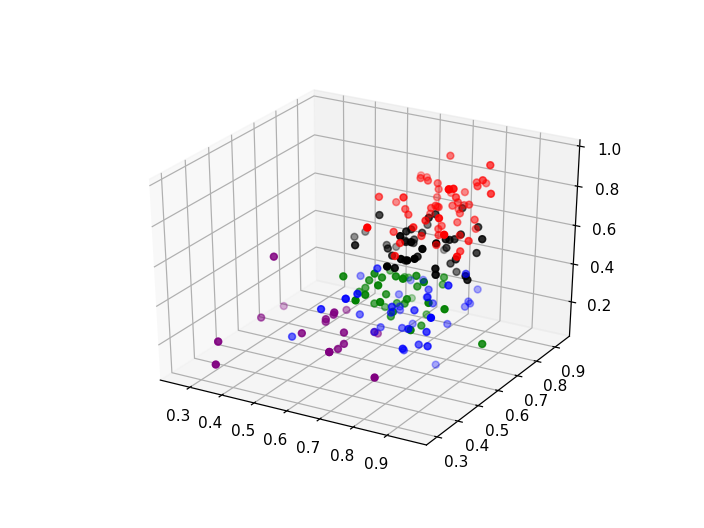

In [15]:
plt3d_2017_2018 = plt.figure().gca(projection="3d")
grupo1_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==0]
grupo2_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==1]
grupo3_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==2]
grupo4_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==3]
grupo5_2017_2018 = conjunto_2017_2018[conjunto_2017_2018.saida==4]

plt3d_2017_2018.scatter(grupo1_2017_2018.danceability, grupo1_2017_2018.energy, grupo1_2017_2018.valence, color="r")
plt3d_2017_2018.scatter(grupo2_2017_2018.danceability, grupo2_2017_2018.energy, grupo2_2017_2018.valence, color="g")
plt3d_2017_2018.scatter(grupo3_2017_2018.danceability, grupo3_2017_2018.energy, grupo3_2017_2018.valence, color="b")
plt3d_2017_2018.scatter(grupo4_2017_2018.danceability, grupo4_2017_2018.energy, grupo4_2017_2018.valence, color="black")
plt3d_2017_2018.scatter(grupo5_2017_2018.danceability, grupo5_2017_2018.energy, grupo5_2017_2018.valence, color="purple")


## Histogramas

In [ ]:
plt.rcParams["figure.figsize"] = [5,3]
plt.rcParams["axes.titlesize"] = 10
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["lines.markersize"] = 10

In [ ]:
top_2017_2018.danceability.plot.hist(density=True, bins=20)

In [ ]:
top_2017_2018.energy.plot.hist(density=True, bins=20)

In [ ]:
top_2017_2018.liveness.plot.hist(density=True, bins=15)

## Análise sobre os Resultados

**Dançabilidade** descreve se a música combina com a sua caracteristica levando em conta a combinação de elementos musicais como o tempo, estabilidade do ritmo, força da batida e regularidade no geral. O valor varia de 0.0 à 1.0.

**Energia** é medida entre 0.0 e 1.0, representa a medida percentual da intensiade da atividade. Tipicamente, musicas energéticas são rapidas, altas e muito barulhentas. Um exemplo é o "Death metal" que tem uma energia alta, enquanto o "Bach" tem uma pontuacao baixa na escala.

**Valência** da musica é medida entre 0.0 e 1.0, descrevendo a positividade da música transmitida pela mesma. Músicas com uma valência alta tem um som mais positivo, como por exemplo felicidade, alegria e euforia. Por outro lado, músicas com valor baixo de valência, soam mais negativas, deprimentes.

- **Grupo 1:**
  - são os pontos de cor vermelha que se situam na parte em que a valência é maior, por isso podem ser categorizados como músicas mais alegres.

In [16]:
grupo1_2017_2018.head()

,danceability,energy,valence,saida
name,,,,
I Like It,0.816,0.726,0.650,0
Nice For What,0.586,0.909,0.757,0
X,0.595,0.773,0.711,0
Moonlight,0.921,0.537,0.711,0
Mine,0.710,0.789,0.717,0


- **Grupo 2:**
    - são os pontos de cor verde, situados em pontos que a energia e a dançabilidade são altas, podem ser categorizados como músicas dançantes e barulhentas.

In [17]:
grupo2_2017_2018.head()

,danceability,energy,valence,saida
name,,,,
In My Feelings,0.835,0.626,0.350,1
Better Now,0.680,0.563,0.374,1
The Middle,0.753,0.657,0.437,1
no tears left to cry,0.699,0.713,0.354,1
Youngblood,0.596,0.854,0.152,1


- **Grupo 3:**
    - são os pontos de cor azul, situados na região em que a energia é maior, categorizando-as como músicas barulhentas.

In [18]:
grupo3_2017_2018.head()

,danceability,energy,valence,saida
name,,,,
God's Plan,0.754,0.449,0.357,2
SAD!,0.740,0.613,0.473,2
Psycho (feat. Ty Dolla $ign),0.739,0.559,0.439,2
IDGAF,0.836,0.544,0.510,2
Havana,0.765,0.523,0.394,2


- **Grupo 4:**
    - são os pontos de cor preta, que engloba as 3 variáveis juntas, podemos categoriza-las como uma música não tão barulhenta, nem dançante e nem tão alegre, mas com resquísios dessas características.

In [19]:
grupo4_2017_2018.head()

,danceability,energy,valence,saida
name,,,,
One Kiss (with Dua Lipa),0.791,0.862,0.592,3
FRIENDS,0.626,0.880,0.534,3
All The Stars (with SZA),0.698,0.633,0.552,3
"These Days (feat. Jess Glynne, Macklemore & Dan Caplen)",0.653,0.809,0.550,3
New Rules,0.762,0.700,0.608,3


- **Grupo 5:**
    - são os pontos de cor roxa, situados na parte baixa de valência, podendo ser categorizadas como músicas mais tristes.

In [21]:
grupo5_2017_2018.head()

,danceability,energy,valence,saida
name,,,,
rockstar (feat. 21 Savage),0.587,0.535,0.1400,4
Lucid Dreams,0.511,0.566,0.2180,4
Perfect,0.599,0.448,0.1680,4
I Fall Apart,0.556,0.538,0.2910,4
Nevermind,0.592,0.691,0.0796,4
